<a href="https://colab.research.google.com/github/greenpenguinkaa/greenpenguinkaa/blob/main/Handwritten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
dataset = np.loadtxt('https://storage.yandexcloud.net/academy.ai/A_Z_Handwritten_Data.csv', delimiter=',')

In [ ]:
X = dataset[:,1:785]
Y = dataset[:,0]

In [ ]:
from sklearn.model_selection import train_test_split
(x_train, x_test, y_train, y_test) = train_test_split(X, Y, test_size=0.2, shuffle=True)

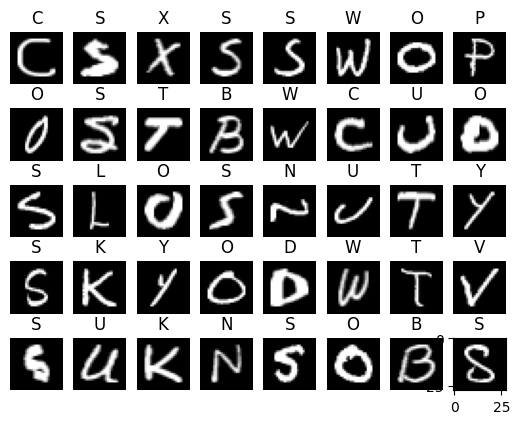

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'}

for i in range(40):
    x = x_train[i]
    x = x.reshape((28, 28))
    plt.axis('off')
    im = plt.subplot(5, 8, i+1)
    plt.title(word_dict.get(y_train[i]))
    im.imshow(x, cmap='gray')


In [ ]:
# Ваше решение
import keras
import tensorflow as tf
from keras import models
from keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1_l2

model = models.Sequential()

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(26, activation='softmax'))

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
 loss='categorical_crossentropy',
 metrics=['accuracy']
              )

In [ ]:
# изменение формы тензора
x_train_ten = x_train.reshape((297960, 28 * 28))

# Задаем тип данным и нормируем на максимальное значение в тензоре (приводим к диапазону [0, 1])
x_train_ten = x_train.astype('float32') / 255

# изменение формы тензора
x_test_ten = x_test.reshape((74491, 28 * 28))

# Задаем тип данным и нормируем на максимальное значение в тензоре (приводим к диапазону [0, 1])
x_test_ten = x_test.astype('float32') / 255

In [ ]:
from keras.utils import to_categorical
train_labels = to_categorical(y_train, 26)
test_labels = to_categorical(y_test, 26)   # Кодируем тестовые метки на 26 классов

In [ ]:
history = model.fit(x_train_ten, train_labels, validation_data=(x_test_ten, test_labels), epochs=5, batch_size=32)

Epoch 1/5
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 90s 10ms/step - accuracy: 0.8473 - loss: 0.5670 - val_accuracy: 0.9223 - val_loss: 0.3460
Epoch 2/5
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 86s 9ms/step - accuracy: 0.9188 - loss: 0.3520 - val_accuracy: 0.9227 - val_loss: 0.3609
Epoch 3/5
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 88s 9ms/step - accuracy: 0.9238 - loss: 0.3490 - val_accuracy: 0.9403 - val_loss: 0.2766
Epoch 4/5
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 140s 9ms/step - accuracy: 0.9275 - loss: 0.3386 - val_accuracy: 0.9279 - val_loss: 0.3530
Epoch 5/5
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 137s 9ms/step - accuracy: 0.9308 - loss: 0.3295 - val_accuracy: 0.9357 - val_loss: 0.3018


In [ ]:
test_loss, test_acc = model.evaluate(x_test_ten, test_labels)
print('Точность на тестовом образцу:', test_acc)
print('Потери на тестовом образце:', test_loss)

2328/2328 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9353 - loss: 0.2993
Точность на тестовом образцу: 0.9356834888458252
Потери на тестовом образце: 0.3018208146095276
